In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("D:\csvFiles\Pumpkin_Seeds_Dataset.xlsx")

In [3]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [4]:
df.shape

(2500, 13)

In [5]:
df['Class'].value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [6]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["Class"]=oe.fit_transform(df[["Class"]])

In [7]:
oe.categories_

[array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)]

In [8]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0.0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0.0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0.0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0.0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0.0


In [9]:
#splitting the data

x=df.iloc[ : , :-1]
y=df.iloc[ : ,-1]

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [12]:
#Applying support vector machine (SVM)

from sklearn.svm import SVC

In [13]:
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [14]:
#prediction

ypred=svc.predict(x_test)

In [15]:
#Result

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [16]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       379
         1.0       0.90      0.84      0.87       371

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



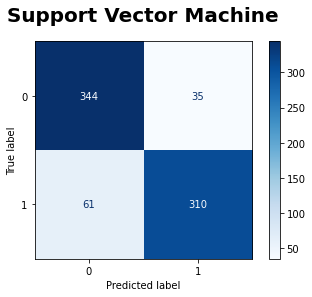

In [17]:
cm = confusion_matrix(y_test, ypred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Support Vector Machine", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

In [18]:
accuracy_score(y_test,ypred)

0.872

In [19]:
print("Accuracy : ", accuracy_score(y_test, ypred))
print("Precision : ", precision_score(y_test, ypred))
print("Recall : ", recall_score(y_test, ypred))
print("F1 score : ", f1_score(y_test, ypred))

Accuracy :  0.872
Precision :  0.8985507246376812
Recall :  0.8355795148247979
F1 score :  0.8659217877094972
